# Import Libraries & Data

In [141]:
!pip install pycaret

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [144]:
df_train.shape

(1460, 81)

# Variable information

In [203]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

2. MSSubClass: The building class

3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
  Condition1: Proximity to main road or railroad
  Condition2: Proximity to main road or railroad (if a second is present)
14. BldgType: Type of dwelling
15. HouseStyle: Style of dwelling
16. OverallQual: Overall material and finish quality
17. OverallCond: Overall condition rating
18. YearBuilt: Original construction date
19. YearRemodAdd: Remodel date
20. RoofStyle: Type of roof
21. RoofMatl: Roof material
22. Exterior1st: Exterior covering on house
23. Exterior2nd: Exterior covering on house (if more than one material)
24. MasVnrType: Masonry veneer type
25. MasVnrArea: Masonry veneer area in square feet
26. ExterQual: Exterior material quality
27. ExterCond: Present condition of the material on the exterior
28. Foundation: Type of foundation
29. BsmtQual: Height of the basement
30. BsmtCond: General condition of the basement
31. BsmtExposure: Walkout or garden level basement walls
32. BsmtFinType1: Quality of basement finished area
33. BsmtFinSF1: Type 1 finished square feet
34. BsmtFinType2: Quality of second finished area (if present)
  BsmtFinSF2: Type 2 finished square feet
  BsmtUnfSF: Unfinished square feet of basement area
35. TotalBsmtSF: Total square feet of basement area
36. Heating: Type of heating
37. HeatingQC: Heating quality and condition
38. CentralAir: Central air conditioning
39. Electrical: Electrical system
40. 1stFlrSF: First Floor square feet
41. 2ndFlrSF: Second floor square feet
42. LowQualFinSF: Low quality finished square feet (all floors)
43. GrLivArea: Above grade (ground) living area square feet
44. BsmtFullBath: Basement full bathrooms
45. BsmtHalfBath: Basement half bathrooms
46. FullBath: Full bathrooms above grade
47. HalfBath: Half baths above grade
48. Bedroom: Number of bedrooms above basement level
49. Kitchen: Number of kitchens
50. KitchenQual: Kitchen quality
51. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
52. Functional: Home functionality rating
53. Fireplaces: Number of fireplaces
54. FireplaceQu: Fireplace quality
55. GarageType: Garage location
56. GarageYrBlt: Year garage was built
57. GarageFinish: Interior finish of the garage
58. GarageCars: Size of garage in car capacity
59. GarageArea: Size of garage in square feet
60. GarageQual: Garage quality
61. GarageCond: Garage condition
62. PavedDrive: Paved driveway
63. WoodDeckSF: Wood deck area in square feet
64. OpenPorchSF: Open porch area in square feet
65. EnclosedPorch: Enclosed porch area in square feet
66. 3SsnPorch: Three season porch area in square feet
67. ScreenPorch: Screen porch area in square feet
68. PoolArea: Pool area in square feet
69. PoolQC: Pool quality
70. Fence: Fence quality
71. MiscFeature: Miscellaneous feature not covered in other categories
72. MiscVal: $Value of miscellaneous feature
73. MoSold: Month Sold
74. YrSold: Year Sold
75. SaleType: Type of sale
76.
SaleCondition: Condition of sale






# Preprocessing

In [311]:
#df_train = df_train.set_index('Id')
#df_test = df_test.set_index('Id')

In [312]:
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'Heating',
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition']


numerical_features = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

numerical_sq_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'PoolArea']

year_vars = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']


In [313]:
# Convert data types
for col in categorical_features:
    df_train[col] = df_train[col].astype('object')
    df_test[col] = df_test[col].astype('object')

for col in numerical_features:
    # Fill NaN values with a suitable value (median) before conversion
    df_train[col] = df_train[col].fillna(df_train[col].median()).astype('int')
    df_test[col] = df_test[col].fillna(df_test[col].median()).astype('int')

for col in numerical_sq_features:
    # Fill NaN values with a suitable value (median) before conversion
    df_train[col] = df_train[col].fillna(df_train[col].median()).astype('int')
    df_test[col] = df_test[col].fillna(df_test[col].median()).astype('int')

In [314]:
for col in categorical_features:
    # Fill missing values with the mode of the column
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

In [315]:
# Drop rows with any missing values
df_train.dropna(inplace=True)

In [316]:
# Check for missing values in each column
missing_values = df_train.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Display the columns with missing values and their counts
missing_values

,0


# Variable Transformations

Transform square root var

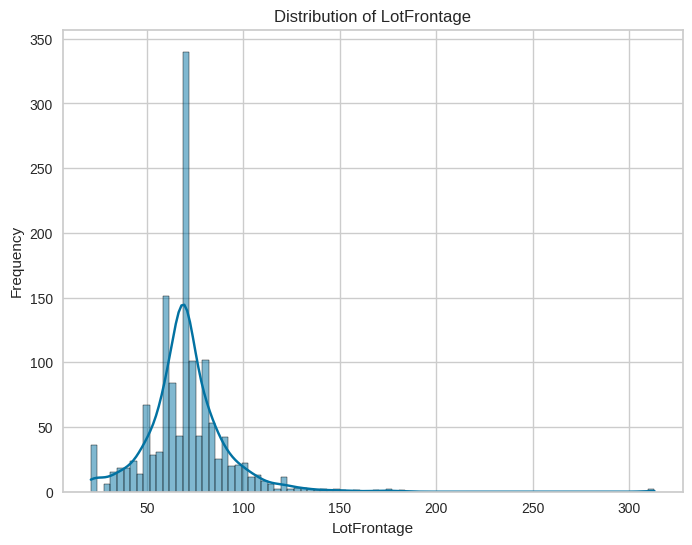

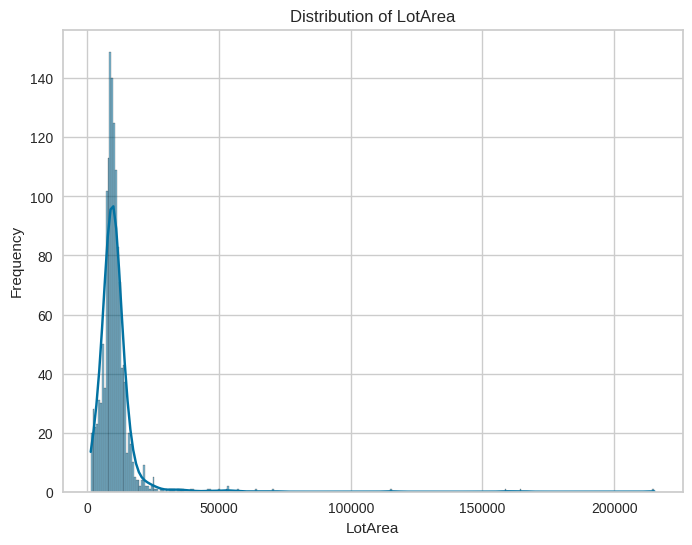

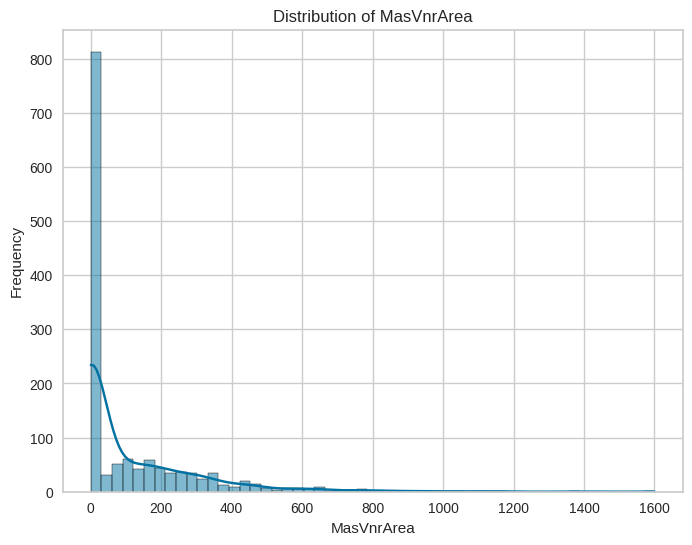

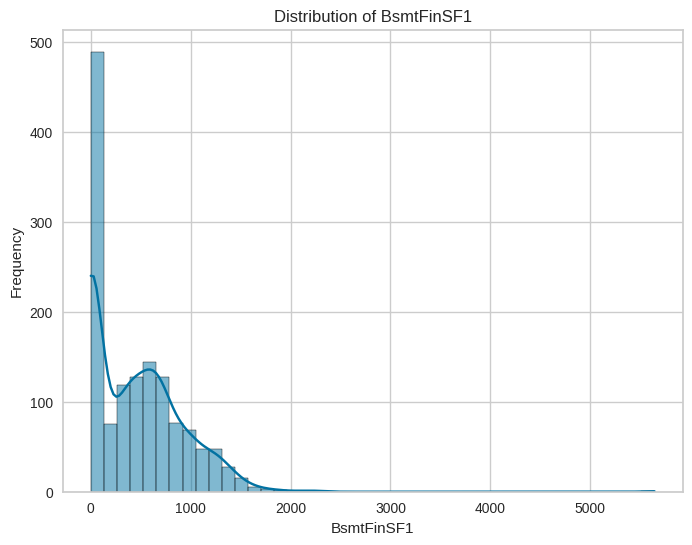

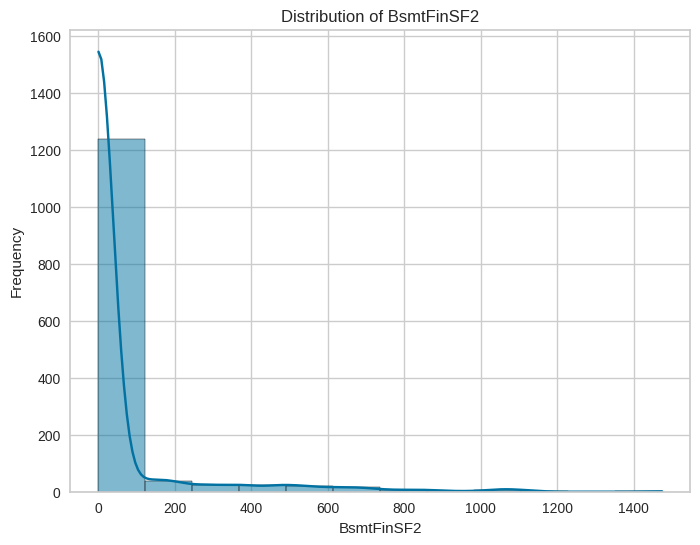

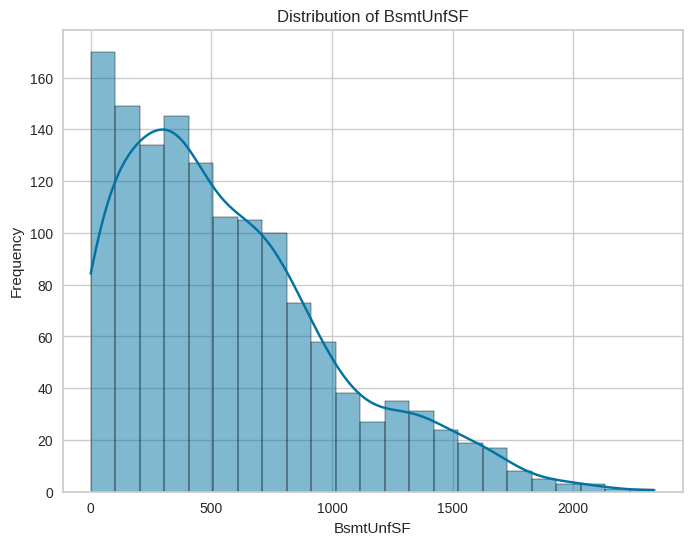

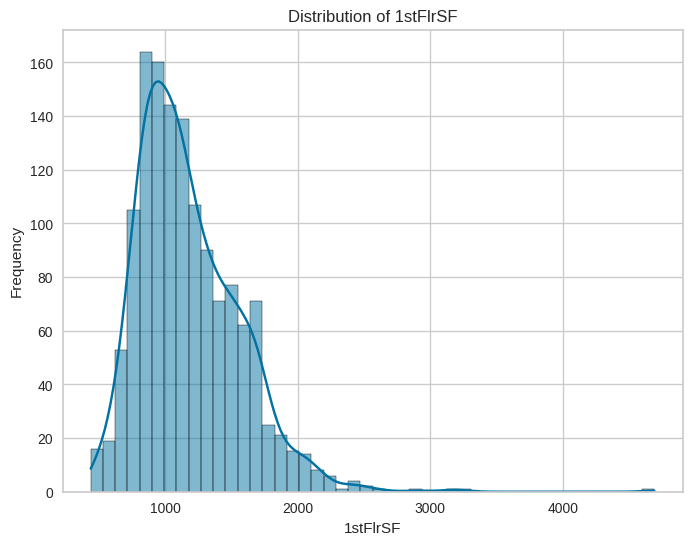

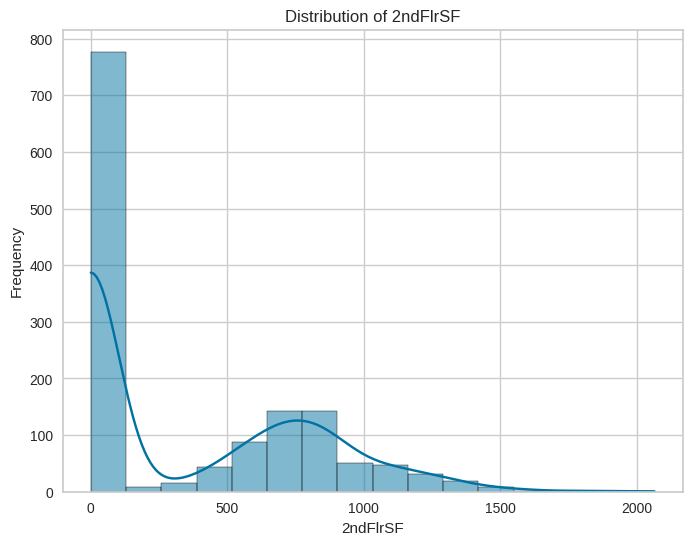

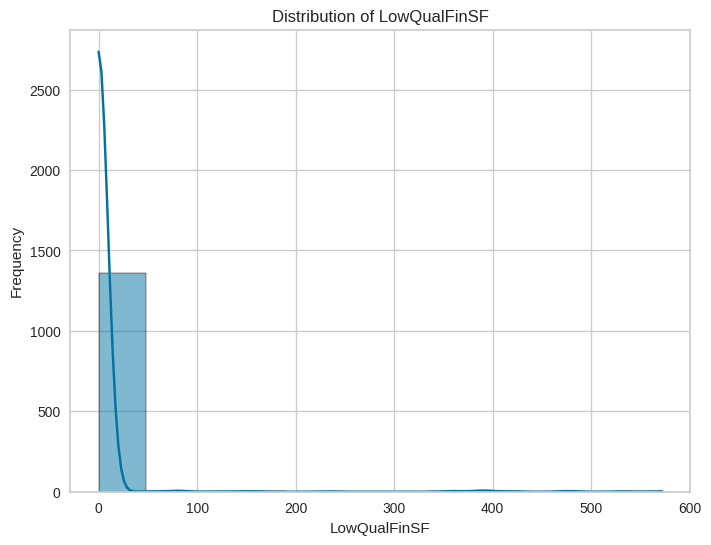

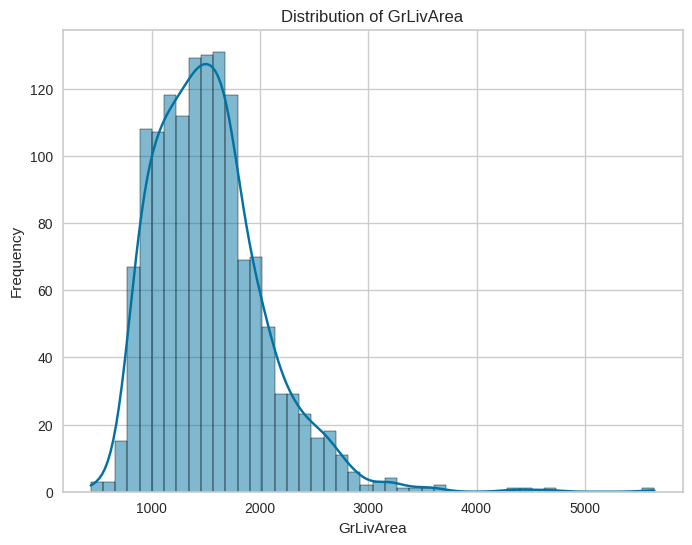

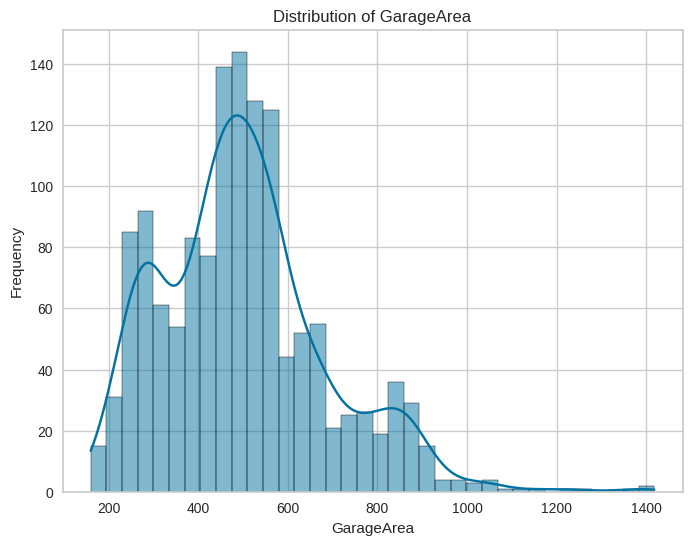

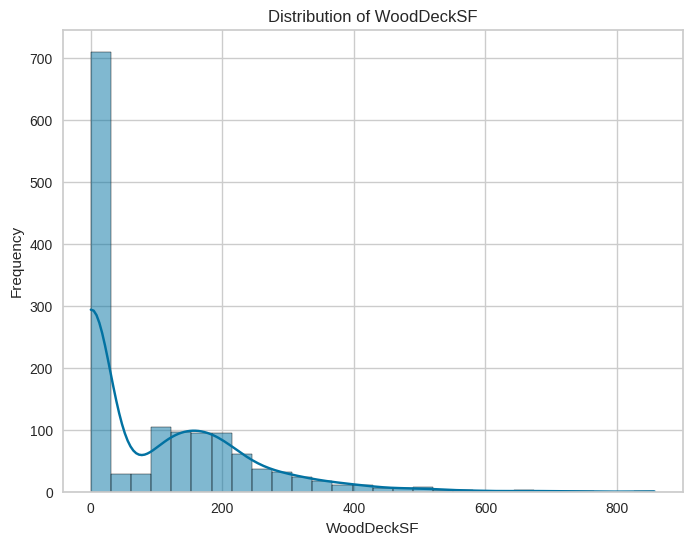

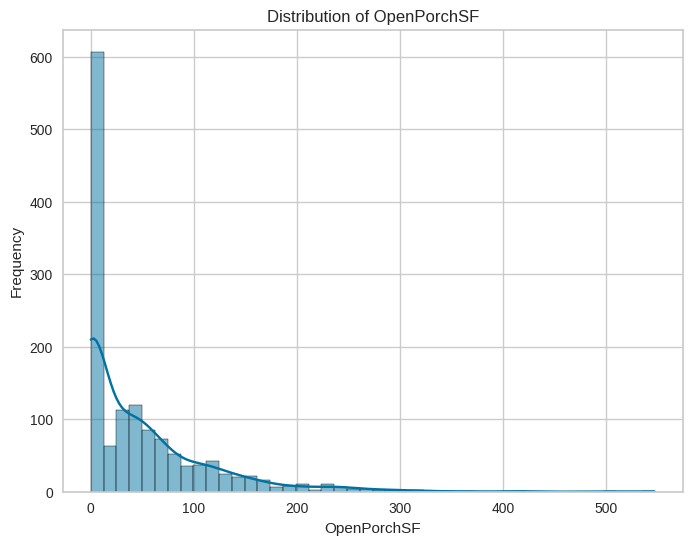

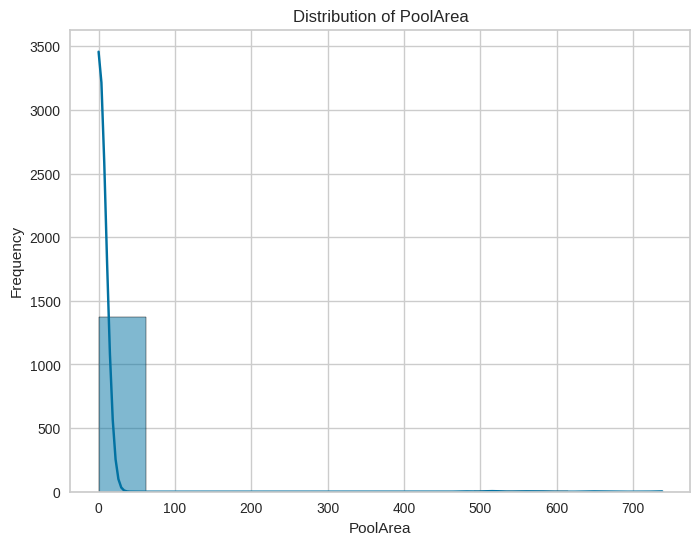

In [317]:
# Loop through each feature and create the distribution plot
for feature in numerical_sq_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(df_train[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

In [318]:
# Apply log transformation to numerical_sq_features
for feature in numerical_sq_features:
    # Add 1 to handle zero values before log transformation
    df_train[feature] = np.log1p(df_train[feature])

    # Check if the feature exists in the test set before applying transformation
    if feature in df_test.columns:
        df_test[feature] = np.log1p(df_test[feature])

Handle MiscVal by distrisizing var

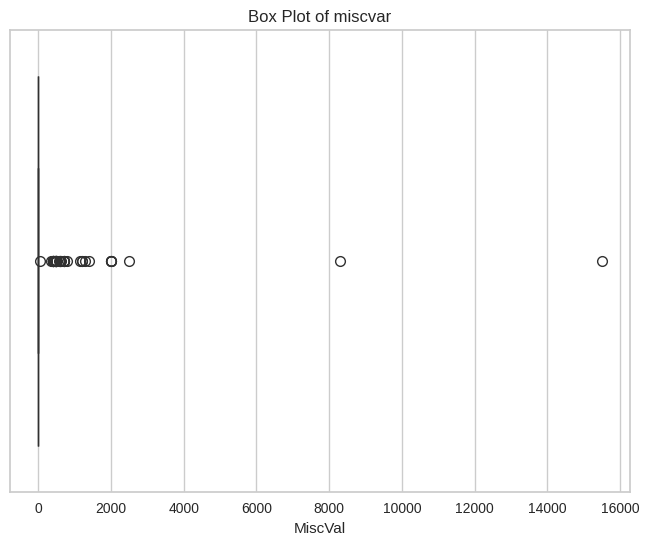

In [319]:
# Show boxplot of MiscVal
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['MiscVal'])
plt.title('Box Plot of miscvar')
plt.show()

In [320]:
# Create bins for MiscVal
bins = list(range(0, 2001, 2000 // 15)) + [2001, 3000, 4000, 5000, 15500]
labels = list(range(len(bins) - 1))
df_train['MiscVal_binned'] = pd.cut(df_train['MiscVal'], bins=bins, labels=labels, right=False)
df_test['MiscVal_binned'] = pd.cut(df_test['MiscVal'], bins=bins, labels=labels, right=False)

# Drop the original MiscVal column
df_train = df_train.drop('MiscVal', axis=1)
df_test = df_test.drop('MiscVal', axis=1)


Handling time related variables by calculating an age for each **var**

In [321]:
# Calculate age-related features
current_year = 2024  # Define the current year

for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df_train[f'{var}_age'] = current_year - df_train[var]
    df_test[f'{var}_age'] = current_year - df_test[var]

#Handle Missing vlaues for garage year
df_train['GarageYrBlt_age'].fillna(df_train['GarageYrBlt_age'].mean(), inplace=True)
df_test['GarageYrBlt_age'].fillna(df_test['GarageYrBlt_age'].mean(), inplace=True)

# Drop original year-related variables
year_vars_to_drop = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
df_train = df_train.drop(columns=year_vars_to_drop, errors='ignore')
df_test = df_test.drop(columns=year_vars_to_drop, errors='ignore')

# Feature Selection

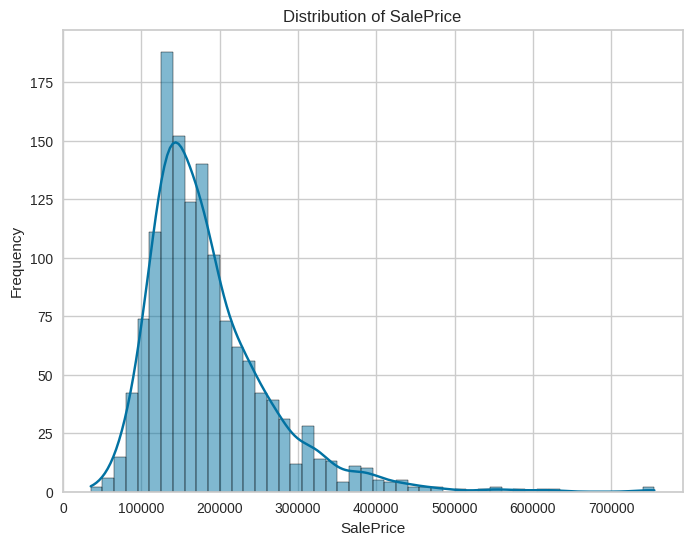

In [301]:
#Plot SalePrice Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

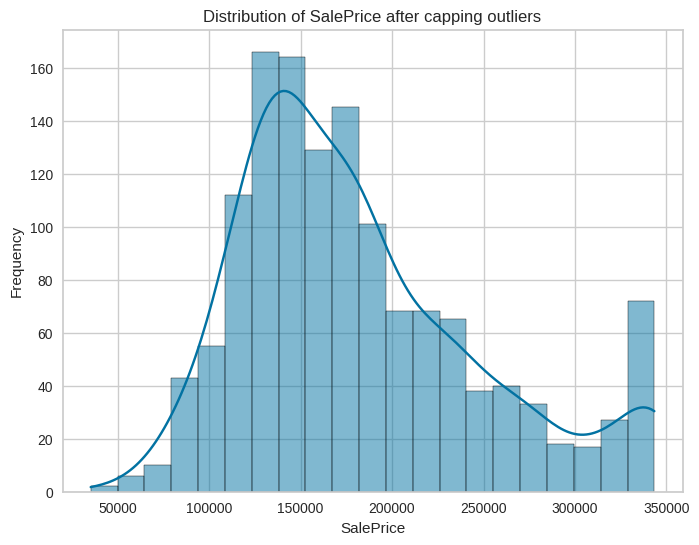

In [322]:
# Calculate the IQR for 'SalePrice'
Q1 = df_train['SalePrice'].quantile(0.25)
Q3 = df_train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df_train['SalePrice'] = np.where(df_train['SalePrice'] < lower_bound, lower_bound, df_train['SalePrice'])
df_train['SalePrice'] = np.where(df_train['SalePrice'] > upper_bound, upper_bound, df_train['SalePrice'])

# Visualize the distribution after capping outliers
plt.figure(figsize=(8, 6))
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice after capping outliers')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [303]:
# Identify numerical features with 'int' dtype
numerical_int_features = df_train.select_dtypes(include=['int']).columns

# Calculate the correlation between numerical features and 'SalePrice'
correlations = df_train[numerical_int_features].corrwith(df_train['SalePrice']).abs()

# Sort the correlations in descending order and select the top 25
top_numerical_features = correlations.sort_values(ascending=False).head(21)

# Display the top 25 numerical features
top_numerical_features

,0
OverallQual,0.813235
GarageCars,0.662329
TotalBsmtSF,0.597879
FullBath,0.580226
YearBuilt_age,0.554082
YearRemodAdd_age,0.552775
TotRmsAbvGrd,0.533209
Fireplaces,0.468357
HalfBath,0.280659
BsmtFullBath,0.239378


In [304]:
# Identify categorical features with 'object' dtype
categorical_object_features = df_train.select_dtypes(include=['object']).columns

# Use ANOVA to find categorical correlation
from scipy.stats import f_oneway

correlations_categorical = {}
for col in categorical_object_features:
    groups = [df_train['SalePrice'][df_train[col] == value] for value in df_train[col].unique()]
    f_statistic, p_value = f_oneway(*groups)
    correlations_categorical[col] = abs(f_statistic)  # Using F-statistic as a measure of association

# Sort the correlations in descending order and select the top 25
top_categorical_features = dict(sorted(correlations_categorical.items(), key=lambda item: item[1], reverse=True)[:40])

# Display the top 25 categorical features
for feature, correlation in top_categorical_features.items():
    print(f"{feature}: {correlation}")

ExterQual: 425.40912356509597
BsmtQual: 409.63086505942215
KitchenQual: 396.67570304721136
GarageFinish: 307.6423899279501
Foundation: 112.44188040711612
HeatingQC: 97.21239707494486
GarageType: 89.35171715377199
CentralAir: 86.14244455877261
MasVnrType: 84.24648709768651
BsmtFinType1: 77.24960051998502
Neighborhood: 74.12094791697972
BsmtExposure: 69.62657656825091
MSZoning: 50.427537886711534
SaleCondition: 41.2883119134943
LotShape: 40.615526966715905
FireplaceQu: 35.3516838014566
PavedDrive: 29.554360716325455
SaleType: 26.41483011307295
Exterior1st: 25.139649668590664
Electrical: 24.580779931700274
Exterior2nd: 21.32939708681612
HouseStyle: 20.153431664707565
BsmtCond: 15.330477431963308
LandContour: 14.635970145596318
BldgType: 13.073556715284719
RoofStyle: 12.947351408876262
GarageCond: 12.193494707161879
GarageQual: 11.927504869101053
ExterCond: 8.82774847139266
Fence: 7.333134420997889
Condition1: 7.102699109547584
LotConfig: 6.390583961575171
Functional: 4.658339589040272
Lan

In [305]:
selected_sqft_features = ['TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1', '1stFlrSF', 'GarageArea', 'GrLivArea', 'MasVnrArea']

In [325]:
# Calculate correlations with 'OverallQual'
correlations_numerical = df_train[numerical_int_features].corrwith(df_train['OverallQual']).abs()
top_numerical_correlations = correlations_numerical.sort_values().head(20)

correlations_categorical = {}
for col in categorical_object_features:
    groups = [df_train['OverallQual'][df_train[col] == value] for value in df_train[col].unique()]
    f_statistic, p_value = f_oneway(*groups)
    correlations_categorical[col] = abs(f_statistic)

top_categorical_correlations = dict(sorted(correlations_categorical.items(), key=lambda item: item[1], reverse=True)[:20])


In [327]:
# Select the top 13 numerical features and 23 categorical features
selected_numerical_features = list(top_numerical_features.index)
selected_categorical_features = list(top_categorical_features.keys())[:43]

# Convert pandas Series to lists before concatenation
top_numerical_correlations_list = list(top_numerical_correlations.index)  # Get index for numerical correlations
top_categorical_correlations_list = list(top_categorical_correlations.keys()) # Get keys for categorical correlations


# Combine the selected features with 'SalePrice'
all_selected_features = selected_numerical_features + selected_categorical_features + ['SalePrice'] + ['Id'] + top_numerical_correlations_list + top_categorical_correlations_list

# Drop all other columns from df_train
df_train = df_train[all_selected_features]

# Make sure the same columns exist in df_test before dropping
df_test = df_test[list(set(all_selected_features) - set(['SalePrice']))]

# Now df_train contains only the selected features and SalePrice
print(df_train.columns)
df_test.columns

Index(['OverallQual', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt_age',
       'YearRemodAdd_age', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath',
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch',
       'ScreenPorch', 'OverallCond', 'MSSubClass', '3SsnPorch', 'BsmtHalfBath',
       'Id', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish',
       'Foundation', 'HeatingQC', 'GarageType', 'CentralAir', 'MasVnrType',
       'BsmtFinType1', 'Neighborhood', 'BsmtExposure', 'MSZoning',
       'SaleCondition', 'LotShape', 'FireplaceQu', 'PavedDrive', 'SaleType',
       'Exterior1st', 'Electrical', 'Exterior2nd', 'HouseStyle', 'BsmtCond',
       'LandContour', 'BldgType', 'RoofStyle', 'GarageCond', 'GarageQual',
       'ExterCond', 'Fence', 'Condition1', 'LotConfig', 'Functional',
       'LandSlope', 'BsmtFinType2', 'Heating', 'RoofMatl', 'PoolQC', 'Street',
       'Condition2', 'SalePrice', 'Id', '3SsnPorch', 'Id', 'MSSubClass',
       'ScreenPorch', 'BsmtHalfBath'

Index(['MasVnrType', 'KitchenAbvGr', 'YearBuilt_age', 'OverallQual', 'PoolQC',
       'GarageQual', 'ScreenPorch', 'BsmtQual', 'Id', 'LotShape',
       'TotRmsAbvGrd', 'BsmtHalfBath', 'Electrical', 'LotConfig', 'Functional',
       'LandSlope', 'YearRemodAdd_age', 'BedroomAbvGr', 'EnclosedPorch',
       'Condition2', 'ExterQual', 'PavedDrive', 'OverallCond', 'BsmtFinType2',
       'Foundation', 'Neighborhood', 'LandContour', 'GarageFinish', 'BldgType',
       'HeatingQC', 'RoofStyle', 'GarageCond', 'Condition1', 'BsmtCond',
       'BsmtExposure', 'HouseStyle', 'TotalBsmtSF', 'FireplaceQu',
       'Fireplaces', 'FullBath', '3SsnPorch', 'Exterior2nd', 'Heating',
       'CentralAir', 'Fence', 'HalfBath', 'SaleType', 'Street', 'MSZoning',
       'GarageType', 'GarageCars', 'MSSubClass', 'Exterior1st',
       'SaleCondition', 'RoofMatl', 'KitchenQual', 'BsmtFullBath', 'ExterCond',
       'BsmtFinType1'],
      dtype='object')

# Linear Regression Models

In [35]:
from pycaret.regression import *

# Initialize the setup
reg = setup(data=df_train,
            target='SalePrice',
            categorical_features=selected_categorical_features,
            train_size=0.8, # Split data into train and validation set (80% train, 20% validation)
            session_id=123) # Set session id for reproducibility


# Train a linear regression model
lr_model = create_model('lr')

# Evaluate the model
evaluate_model(lr_model)
lr_model

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1379, 37)"
4,Transformed data shape,"(1379, 161)"
5,Transformed train set shape,"(1103, 161)"
6,Transformed test set shape,"(276, 161)"
7,Numeric features,13
8,Categorical features,23
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19746.8909,697052571.0095,26401.7532,0.8345,0.1384,0.1084
1,19943.9275,1395959831.1297,37362.5458,0.6415,0.1587,0.1130
2,19798.0419,710380925.3093,26652.9722,0.8694,0.1331,0.1053
3,16760.0579,511485034.1489,22616.0349,0.8870,0.1602,0.1069
4,16341.1364,567159950.9218,23815.1202,0.8695,0.1288,0.0947
5,21005.3932,709375039.0625,26634.0954,0.8359,0.1831,0.1364
6,17875.0711,519583651.0067,22794.3776,0.8761,0.1527,0.1181
7,18994.6911,769801469.8108,27745.2964,0.8210,0.1852,0.1148
8,17975.6180,591590415.6526,24322.6318,0.8858,0.1316,0.1013


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

LinearRegression(n_jobs=-1)

Ridge Regression

In [43]:
# Ridge Regression
ridge_model = create_model('ridge')
# Evaluate the model
evaluate_model(ridge_model)
ridge_model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19162.9004,648719488.7142,25469.9723,0.8460,0.1330,0.1045
1,19335.2393,1144904695.4791,33836.4403,0.7060,0.1524,0.1097
2,19542.2715,666325359.4609,25813.2787,0.8775,0.1290,0.1039
3,16874.7692,516324329.5701,22722.7712,0.8859,0.1602,0.1073
4,16107.2287,553315220.9878,23522.6534,0.8726,0.1275,0.0933
5,20681.2937,676216893.5310,26004.1707,0.8435,0.1662,0.1323
6,17355.1778,492579543.4709,22194.1331,0.8825,0.1535,0.1170
7,18859.3661,735583147.8456,27121.6362,0.8290,0.1719,0.1137
8,17875.3730,588973404.5982,24268.7743,0.8863,0.1304,0.1007


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Ridge(random_state=123)

Lasso Regression

In [44]:
#Lasso Regression
lasso_model = create_model('lasso')
# Evaluate the model
evaluate_model(lasso_model)
lasso_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19655.4820,690899218.9189,26284.9618,0.8359,0.1378,0.1078
1,19892.2767,1388718369.0837,37265.5118,0.6434,0.1584,0.1127
2,19770.2300,706872816.5783,26587.0799,0.8701,0.1328,0.1052
3,16707.0168,509772848.1186,22578.1498,0.8874,0.1599,0.1067
4,16328.7624,566777201.1806,23807.0830,0.8696,0.1285,0.0945
5,20912.9818,704514408.7040,26542.6903,0.8370,0.1809,0.1352
6,17847.4438,517069809.8891,22739.1691,0.8767,0.1527,0.1181
7,18978.7022,765851181.7513,27674.0164,0.8219,0.1835,0.1147
8,17930.8688,590193858.0688,24293.9058,0.8861,0.1313,0.1010


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Lasso(random_state=123)

Elastic Net

In [46]:
# Elastic Net
elastic_model = create_model('en')
# Evaluate the model
evaluate_model(elastic_model)
elastic_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23442.5247,928714828.1966,30474.8229,0.7795,0.1593,0.1286
1,23501.9058,1175454688.8386,34284.9047,0.6982,0.1673,0.1332
2,21360.8440,868805124.1210,29475.5004,0.8403,0.1401,0.1084
3,20425.3259,780693736.4624,27940.8972,0.8275,0.1668,0.1231
4,19965.8615,727128665.8132,26965.3234,0.8326,0.1472,0.1159
5,23770.3989,1029399622.2264,32084.2582,0.7618,0.1854,0.1467
6,20504.7918,704236769.6024,26537.4597,0.8320,0.1756,0.1359
7,20527.0223,744350003.0453,27282.7785,0.8269,0.1420,0.1158
8,23844.2776,1039854748.2106,32246.7789,0.7993,0.1679,0.1333


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

ElasticNet(random_state=123)

Polynomial Regression

In [47]:
# Polynomial Regression
poly_model = create_model('llar')
# Evaluate the model
evaluate_model(poly_model)
poly_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19015.9898,648744537.5531,25470.4640,0.8460,0.1333,0.1038
1,19872.8378,1386476630.9820,37235.4217,0.6440,0.1583,0.1126
2,19804.2655,708019639.2064,26608.6384,0.8699,0.1328,0.1053
3,16705.4745,509640195.0445,22575.2120,0.8874,0.1596,0.1066
4,15839.3080,548700839.7420,23424.3642,0.8737,0.1273,0.0912
5,20936.7282,704035428.4166,26533.6659,0.8371,0.1807,0.1356
6,17848.0433,517082513.3922,22739.4484,0.8767,0.1527,0.1181
7,18936.6274,755943246.0830,27494.4221,0.8243,0.1794,0.1145
8,17931.0713,590150042.4675,24293.0040,0.8861,0.1313,0.1010


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

LassoLars(random_state=123)

# Decision Tree Based Models

Basic Decision Tree

In [155]:
# Decision Tree Regressor
dt_model = create_model('dt')
# Evaluate the model
evaluate_model(dt_model)
dt_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25965.2072,1218878826.9369,34912.4452,0.7106,0.1918,0.1459
1,29934.3784,1839070748.6126,42884.3882,0.5278,0.2171,0.1611
2,25289.0631,1464481824.5586,38268.5488,0.7309,0.2028,0.1481
3,25368.6000,1226022717.4182,35014.6072,0.7291,0.2132,0.1565
4,23564.1545,1385941470.0273,37228.2348,0.6810,0.2026,0.1345
5,22309.0455,903926862.7182,30065.3765,0.7909,0.1913,0.1482
6,25400.2000,1397521572.0182,37383.4398,0.6667,0.2212,0.1607
7,23162.3818,1012416904.2909,31818.4994,0.7646,0.1790,0.1390
8,23957.7818,1113413083.1091,33367.8450,0.7851,0.2033,0.1431


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

DecisionTreeRegressor(random_state=123)

Random Forest Model

In [329]:
# Random Forest Model
rf_model = create_model('rf')
# Evaluate the model
evaluate_model(rf_model)
rf_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18735.6258,648951727.6918,25474.5310,0.8459,0.1307,0.1014
1,18222.0271,719892511.8816,26830.8127,0.8151,0.1386,0.1003
2,17953.2441,611425598.9950,24727.0216,0.8876,0.1304,0.0990
3,16568.2174,546738214.8012,23382.4339,0.8792,0.1418,0.1005
4,18245.3650,814144988.6761,28533.2260,0.8126,0.1537,0.1053
5,18138.0900,660702874.7676,25704.1412,0.8471,0.1666,0.1218
6,16957.7773,497909237.8699,22313.8799,0.8812,0.1579,0.1167
7,16865.3030,605111953.4541,24599.0234,0.8593,0.1347,0.0990
8,19397.0435,715254595.6009,26744.2442,0.8619,0.1413,0.1081


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

RandomForestRegressor(n_jobs=-1, random_state=123)

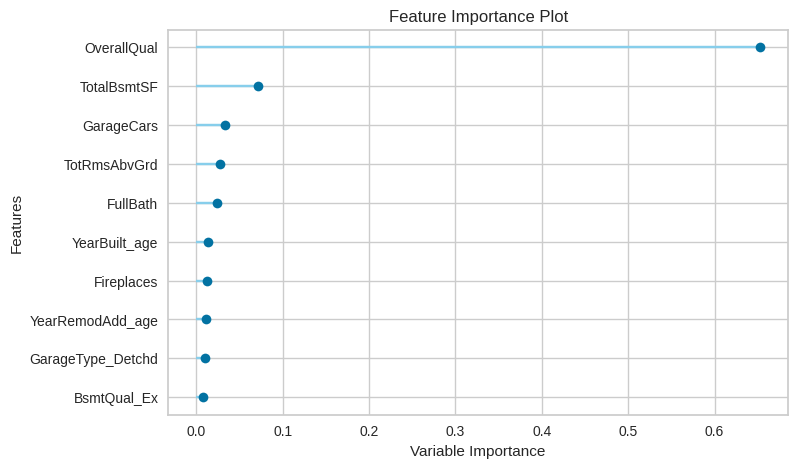

In [154]:
plot_model(rf_model, plot = 'feature')

Using the above information to incorporate features with a strong effect on OverallQual var

Gradient Boosting Regressor

In [330]:
# Gradient Boosting Regressor
gbr_model = create_model('gbr')
# Evaluate the model
evaluate_model(gbr_model)
gbr_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15543.6237,488544512.7995,22103.0431,0.8840,0.1152,0.0853
1,16485.2754,501482967.2477,22393.8154,0.8712,0.1184,0.0912
2,17350.1352,552874912.0459,23513.2922,0.8984,0.1230,0.0940
3,15898.9604,440259483.0842,20982.3612,0.9027,0.1336,0.0998
4,17035.3260,678068695.4225,26039.7522,0.8439,0.1412,0.0972
5,16411.8880,474430541.6696,21781.4265,0.8902,0.1425,0.1087
6,15537.6398,433498381.9068,20820.6240,0.8966,0.1400,0.1016
7,17679.9285,635022320.8419,25199.6492,0.8524,0.1335,0.1014
8,17423.7515,562068087.5338,23707.9752,0.8915,0.1350,0.1011


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

GradientBoostingRegressor(random_state=123)

XG Boost Regressor

In [331]:
# XG Boost Regressor
xgboost_model = create_model('xgboost')
# Evaluate the model
evaluate_model(xgboost_model)
xgboost_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19475.8945,772080384.0000,27786.3340,0.8167,0.1469,0.1061
1,17657.8320,576173760.0000,24003.6191,0.8520,0.1338,0.1013
2,17161.8203,531585568.0000,23056.1387,0.9023,0.1256,0.0962
3,16522.7031,465698432.0000,21580.0469,0.8971,0.1357,0.1028
4,19774.4590,1018183296.0000,31908.9844,0.7657,0.1624,0.1115
5,16275.6094,498064352.0000,22317.3555,0.8848,0.1537,0.1122
6,17237.1211,543492992.0000,23312.9355,0.8704,0.1563,0.1134
7,16258.6641,563606912.0000,23740.4062,0.8690,0.1272,0.0935
8,19344.2520,596692864.0000,24427.2969,0.8848,0.1428,0.1142


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

Light GBM regressor

In [332]:
# Light GBM regressor
lightgbm_model = create_model('lightgbm')
# Evaluate the model
evaluate_model(lightgbm_model)
lightgbm_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16811.5579,566330691.8222,23797.7035,0.8655,0.1168,0.0889
1,17796.6516,702721507.2909,26508.8949,0.8196,0.1379,0.1012
2,17409.2054,546803812.7964,23383.8366,0.8995,0.1273,0.0959
3,16666.6579,458054028.7566,21402.1968,0.8988,0.1328,0.1021
4,16736.3394,702225738.0186,26499.5422,0.8384,0.1428,0.0982
5,16502.4245,497758048.1151,22310.4919,0.8848,0.1530,0.1139
6,16505.9373,472974942.0423,21747.9871,0.8872,0.1567,0.1137
7,15384.5140,499785690.2647,22355.8872,0.8838,0.1187,0.0889
8,18232.3970,702245430.5215,26499.9138,0.8644,0.1449,0.1053


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

LGBMRegressor(n_jobs=-1, random_state=123)

# Support Vector Machines

In [54]:
# Support Vector Machines
svm_model = create_model('svm')
# Evaluate the model
evaluate_model(svm_model)
svm_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50481.4479,4795439194.6330,69249.1097,-0.1387,0.3541,0.2660
1,46822.5775,4233350037.9421,65064.1994,-0.0870,0.3252,0.2438
2,59609.5553,6393115462.9311,79956.9601,-0.1749,0.3824,0.2868
3,53144.3172,4713524930.6021,68655.1158,-0.0414,0.3798,0.3207
4,52106.5989,4501130222.6115,67090.4630,-0.0360,0.3601,0.3009
5,52642.2686,4318213978.3696,65713.1188,0.0009,0.3852,0.3527
6,50022.5101,4250409387.4538,65195.1638,-0.0138,0.3820,0.3275
7,50647.1430,4605628868.5783,67864.7837,-0.0708,0.3495,0.2777
8,55931.8931,5420263587.7187,73622.4394,-0.0463,0.3689,0.3003


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

SVR()

# Nueral Network Models

Feed Foward Nueral Network

In [55]:
# Neural Network (MLPRegressor)
mlp_model = create_model('mlp')
# Evaluate the model
evaluate_model(mlp_model)
mlp_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,115051.5494,18611063412.5991,136422.3714,-3.4192,1.0657,0.5575
1,105946.2913,16627274100.0517,128946.7879,-3.2696,0.9762,0.5255
2,118267.9946,21494154979.1804,146608.8503,-2.9502,1.0583,0.5418
3,100309.6350,15849521592.1308,125894.8831,-2.5019,0.9444,0.4970
4,106436.9657,17168496925.1183,131028.6111,-2.9515,1.0130,0.5363
5,92946.0821,14024767445.2209,118426.2110,-2.2450,0.9376,0.4955
6,99530.2384,14907139109.2956,122094.7956,-2.5555,0.9217,0.5601
7,104116.1020,17073480916.0637,130665.5307,-2.9694,0.9731,0.5148
8,100852.9619,16921962350.1610,130084.4432,-2.2665,0.9168,0.4834


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

MLPRegressor(max_iter=500, random_state=123)

Keras Nueral Network

In [64]:
!pip install scikeras

In [67]:
# Create dummy variables for categorical features in df_train
df_train = pd.get_dummies(df_train, drop_first=True)

# Display the updated DataFrame columns to verify the creation of dummy variables.
df_train.columns

Index(['OverallQual', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt_age',
       'YearRemodAdd_age', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath',
       'BsmtFullBath',
       ...
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA'],
      dtype='object', length=142)

In [68]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Prepare data for Keras
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']


# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


# Define Keras model
def create_keras_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
    model.add(Dense(32, activation='relu'))  # Hidden layer
    model.add(Dense(1))  # Output layer (regression)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

keras_regressor = KerasRegressor(build_fn=create_keras_model, epochs=100, batch_size=32, verbose=0)

# Train the model
keras_regressor.fit(X_train, y_train)

# Evaluate the model
y_pred = keras_regressor.predict(X_val)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2089585848.4624617
R-squared: 0.5627924495604617


# Ensemble Models

Adaboost Regressor

In [69]:
# Adaboost Regressor
adaboost_model = create_model('ada')
# Evaluate the model
evaluate_model(adaboost_model)
adaboost_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22940.3353,852408416.2795,29196.0343,0.7976,0.1591,0.1310
1,23644.3924,968877610.8961,31126.7989,0.7512,0.1676,0.1372
2,23259.8683,911188329.9097,30185.8962,0.8325,0.1533,0.1259
3,23080.3493,895119295.8016,29918.5443,0.8022,0.1823,0.1460
4,23114.2410,1015119437.5645,31860.9391,0.7664,0.1830,0.1427
5,23900.8431,915629164.6196,30259.3649,0.7881,0.2024,0.1666
6,21495.6033,795886832.6540,28211.4663,0.8102,0.1975,0.1531
7,23487.8276,1019975503.0437,31937.0553,0.7629,0.1687,0.1379
8,24158.2199,1120326669.0920,33471.2813,0.7837,0.1784,0.1380


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

AdaBoostRegressor(random_state=123)

Stacking Regressor

In [76]:
# Stacking Regressor
stack_model = stack_models(estimator_list = [lr_model, ridge_model, lasso_model, elastic_model])
# Evaluate the model
evaluate_model(stack_model)
stack_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19436.5115,642941680.4216,25356.2947,0.8473,0.1369,0.1058
1,19449.1530,1139734167.6838,33759.9492,0.7073,0.1523,0.1107
2,19084.7836,626290341.2285,25025.7935,0.8849,0.1260,0.1005
3,16937.4243,541165541.1499,23262.9650,0.8804,0.1645,0.1070
4,15698.5732,525909440.9699,22932.7155,0.8790,0.1257,0.0911
5,20839.0039,701226240.6409,26480.6767,0.8378,0.1637,0.1332
6,17323.0064,491531927.4140,22170.5193,0.8828,0.1561,0.1173
7,18474.7683,680933421.2406,26094.7010,0.8417,0.1573,0.1111
8,18331.4216,611172771.1893,24721.9087,0.8820,0.1318,0.1031


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

StackingRegressor(cv=5,
                  estimators=[('Linear Regression',
                               LinearRegression(n_jobs=-1)),
                              ('Ridge Regression', Ridge(random_state=123)),
                              ('Lasso Regression', Lasso(random_state=123)),
                              ('Elastic Net', ElasticNet(random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [333]:
# Stacking Regressor
stack_model = stack_models(estimator_list = [rf_model, gbr_model, xgboost_model, lightgbm_model])
# Evaluate the model
evaluate_model(stack_model)
stack_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15456.9409,473666822.8693,21763.8880,0.8875,0.1112,0.0835
1,16407.2497,518993975.4139,22781.4393,0.8667,0.1218,0.0922
2,16537.6886,504266823.8286,22455.8862,0.9073,0.1197,0.0905
3,15861.8132,424378747.8140,20600.4550,0.9062,0.1296,0.0989
4,16661.2820,671039026.8994,25904.4210,0.8456,0.1388,0.0957
5,15191.6098,422438341.9102,20553.3049,0.9023,0.1407,0.1043
6,15705.7320,437441823.8919,20915.1099,0.8957,0.1442,0.1040
7,16280.7069,555671419.7401,23572.6838,0.8708,0.1240,0.0927
8,17467.1367,599662617.8359,24488.0097,0.8842,0.1388,0.1023


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

StackingRegressor(cv=5,
                  estimators=[('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cp...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

Blended Regressor optimizing RMSE

In [77]:
# Blend top models
blender = blend_models(estimator_list=[rf_model, gbr_model, xgboost_model, lightgbm_model], optimize='RMSE')
evaluate_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16871.1184,552945320.3528,23514.7894,0.8687,0.1197,0.0906
1,16621.7090,560652161.3073,23678.0945,0.8560,0.1264,0.0934
2,16282.3774,497523641.8757,22305.2380,0.9086,0.1190,0.0907
3,15586.4435,434310375.1511,20840.1146,0.9040,0.1306,0.0969
4,17021.7378,723635387.1251,26900.4719,0.8334,0.1433,0.0974
5,15803.2229,485564930.4452,22035.5379,0.8877,0.1481,0.1084
6,15833.7810,440980596.7534,20999.5380,0.8948,0.1472,0.1073
7,15334.9359,529103409.8218,23002.2479,0.8770,0.1221,0.0887
8,17996.5803,584630055.8750,24179.1244,0.8871,0.1349,0.1034


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# KNN Model

In [79]:
# KNN
knn_model = create_model('knn')
# Evaluate the model
evaluate_model(knn_model)
knn_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26768.2793,1459289344.0000,38200.6445,0.6535,0.2147,0.1512
1,22859.8633,1197642752.0000,34606.9766,0.6925,0.1740,0.1260
2,25108.8555,1291696000.0000,35940.1719,0.7626,0.1807,0.1332
3,27625.0430,1442222464.0000,37976.6055,0.6813,0.2348,0.1774
4,22840.4727,1171367424.0000,34225.2461,0.7304,0.1926,0.1311
5,27537.6777,1605748352.0000,40071.7891,0.6285,0.2387,0.1759
6,25740.7832,1233194752.0000,35116.8711,0.7059,0.2275,0.1760
7,22368.7793,933197312.0000,30548.2793,0.7830,0.1739,0.1310
8,29053.8574,1660915200.0000,40754.3281,0.6794,0.2210,0.1601


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

KNeighborsRegressor(n_jobs=-1)

# Tuning

**Highest Performing Models by R2/RMSE before tuning**

1. Stacked Regressor: R2 = 0.8815, RMSE = 22935.39
2. Blended Regressor: R2 = 0.8765, RMSE = 23381.53
3. Gradient Boost Regressor: R2 = 0.8758, RMSE = 23456.49
4. Light GBM: R2 = 0.8699, RMSE = 24064.34

Stacked Regressor Tuning

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15456.9409,473666822.8693,21763.8880,0.8875,0.1112,0.0835
1,16407.2497,518993975.4139,22781.4393,0.8667,0.1218,0.0922
2,16537.6886,504266823.8286,22455.8862,0.9073,0.1197,0.0905
3,15861.8132,424378747.8140,20600.4550,0.9062,0.1296,0.0989
4,16661.2820,671039026.8994,25904.4210,0.8456,0.1388,0.0957
5,15191.6098,422438341.9102,20553.3049,0.9023,0.1407,0.1043
6,15705.7320,437441823.8919,20915.1099,0.8957,0.1442,0.1040
7,16280.7069,555671419.7401,23572.6838,0.8708,0.1240,0.0927
8,17467.1367,599662617.8359,24488.0097,0.8842,0.1388,0.1023


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

StackingRegressor(cv=5,
                  estimators=[('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cp...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

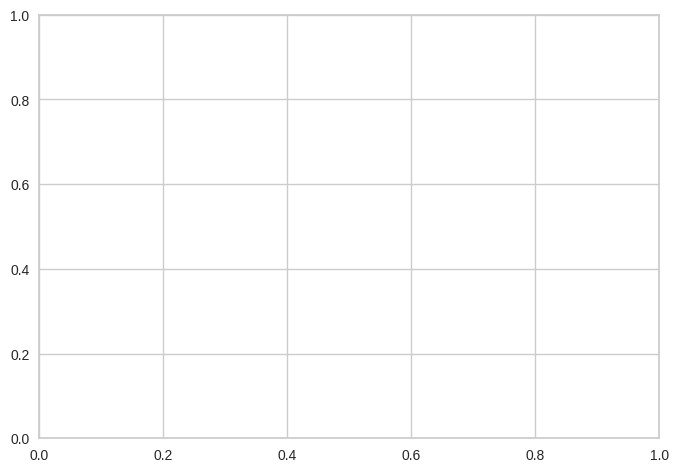

In [170]:
tuned_stack_model = tune_model(stack_model, optimize = 'RMSE')
# Evaluate the tuned model
evaluate_model(tuned_stack_model)
tuned_stack_model

Blended Regressor Tuning

In [171]:
tuned_blender = tune_model(blender, optimize = 'RMSE')
evaluate_model(tuned_blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16144.3807,514054987.8296,22672.7808,0.8779,0.1147,0.0864
1,16480.3938,541184470.7764,23263.3719,0.8610,0.1246,0.0930
2,16273.0420,492095235.5066,22183.2197,0.9096,0.1187,0.0900
3,15714.1108,421719343.9354,20535.8064,0.9068,0.1294,0.0979
4,16719.1213,684623379.9541,26165.3087,0.8424,0.1401,0.0960
5,15511.5110,451448819.4455,21247.3250,0.8955,0.1442,0.1067
6,15626.2208,432620623.6178,20799.5342,0.8968,0.1458,0.1051
7,15523.2150,524440628.6467,22900.6687,0.8781,0.1209,0.0893
8,17621.9918,579839615.8577,24079.8591,0.8881,0.1357,0.1022


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

GB Regressor Tuning

In [172]:
tuned_gbr_model = tune_model(gbr_model, optimize = 'RMSE')
# Evaluate the tuned model
evaluate_model(tuned_gbr_model)
tuned_gbr_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17957.9576,643934294.7643,25375.8605,0.8471,0.1271,0.0941
1,19188.3966,673730120.7155,25956.3118,0.8270,0.1417,0.1105
2,17840.2674,589445465.3735,24278.4980,0.8917,0.1320,0.1000
3,16707.5775,515978027.5461,22715.1497,0.8860,0.1319,0.0978
4,17555.7795,698412131.0075,26427.4882,0.8393,0.1439,0.1011
5,16211.4838,475605969.0304,21808.3922,0.8900,0.1490,0.1114
6,17864.1209,579084542.9099,24064.1755,0.8619,0.1552,0.1151
7,15532.3389,528285466.9173,22984.4614,0.8772,0.1248,0.0894
8,18767.3333,705411771.8772,26559.5891,0.8638,0.1364,0.1041


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

GradientBoostingRegressor(random_state=123)

Light GBR Tuning

In [173]:
tuned_lightgbm_model = tune_model(lightgbm_model, optimize = 'RMSE')
# Evaluate the tuned model
evaluate_model(tuned_lightgbm_model)
tuned_lightgbm_model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16459.1023,501550707.0953,22395.3278,0.8809,0.1170,0.0894
1,18985.3015,822751829.4809,28683.6509,0.7887,0.1451,0.1077
2,17066.0928,553073851.9398,23517.5222,0.8984,0.1235,0.0919
3,19427.3258,613035083.6398,24759.5453,0.8646,0.1590,0.1240
4,17368.8988,662886397.1276,25746.5803,0.8474,0.1462,0.1050
5,16864.6656,500737887.7598,22377.1734,0.8841,0.1505,0.1141
6,17756.9185,527320554.2924,22963.4613,0.8742,0.1593,0.1203
7,16682.9190,579647485.8226,24075.8694,0.8652,0.1304,0.0977
8,17907.4429,623973088.9820,24979.4533,0.8796,0.1400,0.1055


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

LGBMRegressor(n_jobs=-1, random_state=123)

# Testing Using Best Model

Best Performing Model by R2/RMSE

1. Stacked Regressor: R2 = 0.8815, RMSE = 22935.39


In [336]:
# Make predictions on the test data
predictions = predict_model(stack_model, data=df_test)

# Reset the index of predictions to include 'Id' as a column
predictions = predictions.reset_index()

# Extract 'Id' and 'prediction_label' columns from the predictions DataFrame
submission_df = predictions[['Id', 'prediction_label']]  # Changed 'Label' to 'prediction_label'

# Rename 'prediction_label' to 'SalePrice'
submission_df = submission_df.rename(columns={'prediction_label': 'SalePrice'})  # Changed 'Label' to 'prediction_label'

# Save the predictions to a CSV file
submission_df.to_csv('israel_final_submission.csv', index=False)

In [308]:
import pandas as pd
submission_df = pd.read_csv('israels_submission.csv')
submission_df

,Id,SalePrice
0,1461,130647.589773
1,1462,146196.600343
2,1463,186961.670842
3,1464,196891.857751
4,1465,238495.469319
...,...,...
1454,2915,119857.531356
1455,2916,117196.569792
1456,2917,167548.517456
1457,2918,173699.402765
